In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import f_regression,f_classif,chi2,SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [83]:
file = pd.read_csv("C:\\Users\\dharu\\Downloads\\archive (21)\\features.csv")

In [84]:
file.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [85]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [86]:
file.shape

(8190, 12)

In [87]:
stor = pd.read_csv("C:\\Users\\dharu\\Downloads\\archive (21)\\stores.csv")

In [88]:
stor.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [89]:
train = pd.read_csv("C:\\Users\\dharu\\Downloads\\archive (21)\\train.csv")

In [90]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [92]:
train.shape

(421570, 5)

In [93]:
lst = list(file.columns)
flo = []
impute = SimpleImputer(strategy = "mean")
for i in lst:
    if file[i].dtype == "float64" or file[i].dtype == "int64":
        flo.append(i)
file[flo] = impute.fit_transform(file[flo])
file["Date"] = pd.to_datetime(file["Date"])

In [94]:
file

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1.0,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False
1,1.0,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106000,True
2,1.0,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106000,False
3,1.0,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106000,False
4,1.0,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45.0,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,False
8186,45.0,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,False
8187,45.0,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,False
8188,45.0,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,False


In [95]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   float64       
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(10)
memory usage: 712.0 KB


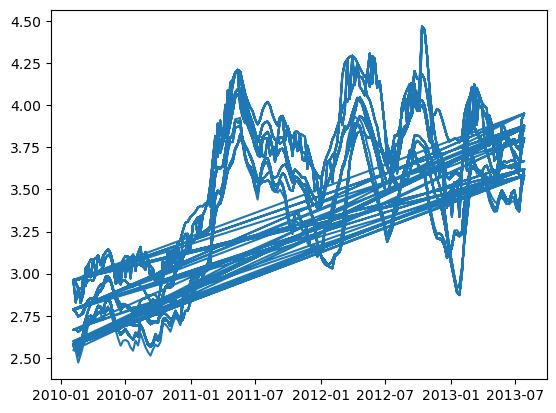

In [96]:
dates = file["Date"]
fuel = file["Fuel_Price"]
plt.plot(dates,fuel)#Dates and Fuel Prices for the market dashboard, we can add live monitoring of fuel prices on the dashboard 

<AxesSubplot:>

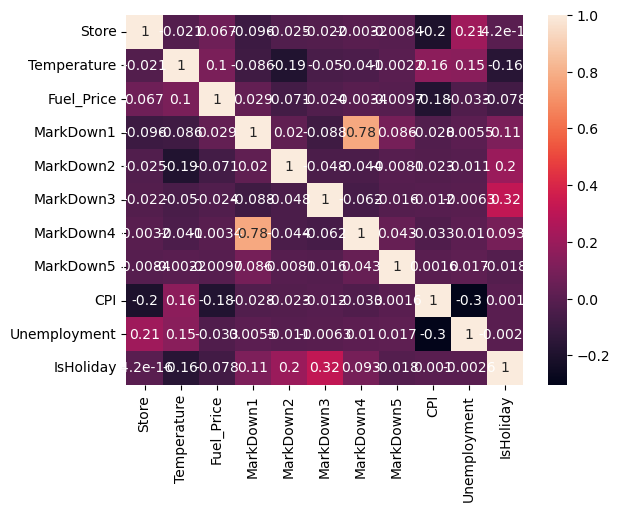

In [97]:
sns.heatmap(file.corr(),annot = True)

In [98]:
file.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,1.000000e+00,-0.020566,0.066682,-0.095997,-0.025433,-0.021948,-0.003174,-0.008417,-0.201670,0.213108,-4.186667e-16
Temperature,-2.056605e-02,1.000000,0.101354,-0.086103,-0.190137,-0.050232,-0.040768,-0.002240,0.158709,0.145643,-1.619056e-01
Fuel_Price,6.668205e-02,0.101354,1.000000,0.029247,-0.071321,-0.023802,-0.003434,-0.009740,-0.184127,-0.032900,-7.823797e-02
MarkDown1,-9.599717e-02,-0.086103,0.029247,1.000000,0.020053,-0.087711,0.775578,0.085953,-0.027963,0.005505,1.114263e-01
MarkDown2,-2.543271e-02,-0.190137,-0.071321,0.020053,1.000000,-0.047730,-0.043820,-0.008064,-0.022952,-0.010594,2.001131e-01
MarkDown3,-2.194816e-02,-0.050232,-0.023802,-0.087711,-0.047730,1.000000,-0.061555,-0.015902,-0.011890,-0.006267,3.163521e-01
MarkDown4,-3.174389e-03,-0.040768,-0.003434,0.775578,-0.043820,-0.061555,1.000000,0.042744,-0.033054,0.010472,9.341548e-02
MarkDown5,-8.417391e-03,-0.002240,-0.009740,0.085953,-0.008064,-0.015902,0.042744,1.000000,0.001570,0.017411,-1.801126e-02
CPI,-2.016696e-01,0.158709,-0.184127,-0.027963,-0.022952,-0.011890,-0.033054,0.001570,1.000000,-0.303110,1.005442e-03
Unemployment,2.131079e-01,0.145643,-0.032900,0.005505,-0.010594,-0.006267,0.010472,0.017411,-0.303110,1.000000,-2.636558e-03


In [99]:
data = file[["Date","IsHoliday","CPI"]]
hols = data["IsHoliday"]
cpi = data["CPI"]
dte = data["Date"]#We can add these type of visualisations and understand how holidays can affect the CPI levels

In [100]:
data.describe()

,CPI
count,8190.000000
mean,172.460809
std,38.292649
min,126.064000
25%,132.653774
50%,172.460809
75%,212.766994
max,228.976456


<BarContainer object of 421570 artists>

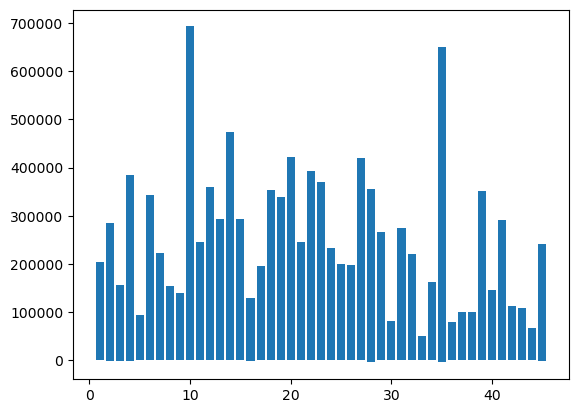

In [101]:
plt.bar(train["Store"],train["Weekly_Sales"]) #Analysis of Sales with each store

<BarContainer object of 45 artists>

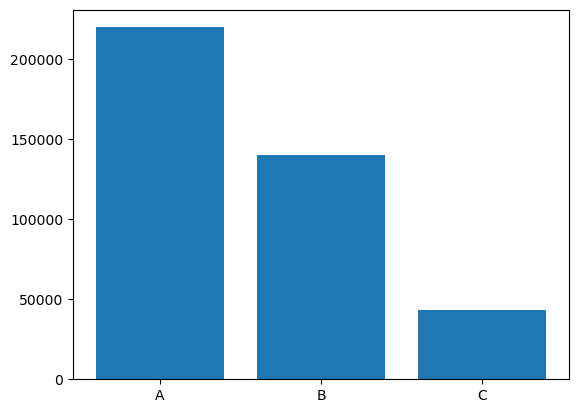

In [102]:
plt.bar(stor["Type"],stor["Size"]) # Analyzing the size of the stores based on the type

Determining Holidays for Workforce Management Component
Using  this feature, the owners will be able understand about improving the productivity within the company

In [103]:
X = abs(file[list([i for i in file.columns if file[i].dtype == "float64" or file[i].dtype == "int64"])])
standard = StandardScaler()
lab = LabelEncoder()
y = lab.fit_transform(file["IsHoliday"])
ob = SelectKBest(chi2,k=2)
X_best = ob.fit_transform(X,y)
data = standard.fit_transform(X_best)
X_train,X_test,y_train,y_test = train_test_split(data,y)
dec = DecisionTreeClassifier()
sv = SVC()
dec.fit(X_train,y_train)
sv.fit(X_train,y_train)
dec.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
print(classification_report(dec.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1963
           1       0.24      0.44      0.31        85

    accuracy                           0.92      2048
   macro avg       0.61      0.69      0.63      2048
weighted avg       0.94      0.92      0.93      2048



In [106]:
print(classification_report(sv.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2017
           1       0.19      0.94      0.32        31

    accuracy                           0.94      2048
   macro avg       0.59      0.94      0.64      2048
weighted avg       0.99      0.94      0.96      2048

